<a href="https://colab.research.google.com/github/domywillygithub/Codes/blob/main/TSA_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/co2_mm_mlo.csv')
df

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
724,2018,7,2018.542,408.71,408.71
725,2018,8,2018.625,406.99,406.99
726,2018,9,2018.708,405.51,405.51
727,2018,10,2018.792,406.00,406.00


In [ ]:
# Convert 'year' and 'month' columns to datetime format
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Select the relevant columns
data = df[['average', 'interpolated']]

# Remove missing values if any
data.dropna(inplace=True)

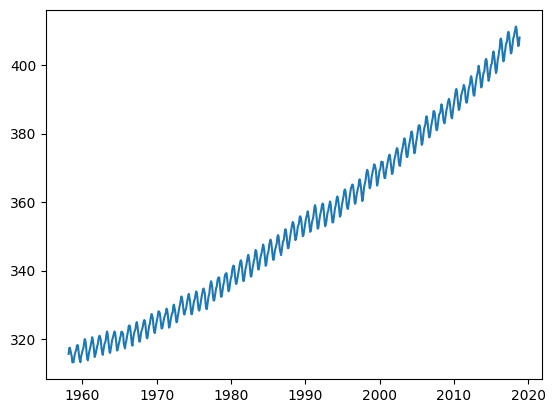

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data['interpolated'])

In [ ]:
data

,average,interpolated
date,,
1958-03-01,315.71,315.71
1958-04-01,317.45,317.45
1958-05-01,317.50,317.50
1958-07-01,315.86,315.86
1958-08-01,314.93,314.93
...,...,...
2018-07-01,408.71,408.71
2018-08-01,406.99,406.99
2018-09-01,405.51,405.51


In [ ]:
train_data = data.iloc[:-12]
test_data = data.iloc[-12:]

# SARIMAX MODEL

In [ ]:
auto_arima(train_data['interpolated'],seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  710
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -457.933
Date:                              Thu, 01 Jun 2023   AIC                            929.866
Time:                                      09:31:40   BIC                            961.813
Sample:                                           0   HQIC                           942.208
                                              - 710                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6050      0.028     56.666      0.000       1.549       1.661
ar.L2         -0.8608      0.027    -32.480      0.000      -0.913      -0.809
ma.L1         -1.6199      0.035    -45.773      0.000      -1.689      -1.551
ma.L2          0.7320      0.037     19.813      0.000       0.660       0.804
ar.S.L12       0.9642      0.010     92.410      0.000       0.944       0.985
ma.S.L12      -0.5775      0.036    -16.094      0.000      -0.648      -0.507
sigma2         0.2072      0.008     25.169      0.000       0.191       0.223
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               170.66
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model=SARIMAX(train_data['interpolated'],order=(2,1,2),seasonal_order=(1,0,1,12)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  710
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -457.933
Date:                              Thu, 01 Jun 2023   AIC                            929.866
Time:                                      09:31:43   BIC                            961.813
Sample:                                           0   HQIC                           942.208
                                              - 710                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6050      0.028     56.666      0.000       1.549       1.661
ar.L2         -0.8608      0.027    -32.480      0.000      -0.913      -0.809
ma.L1         -1.6199      0.035    -45.773      0.000      -1.689      -1.551
ma.L2          0.7320      0.037     19.813      0.000       0.660       0.804
ar.S.L12       0.9642      0.010     92.410      0.000       0.944       0.985
ma.S.L12      -0.5775      0.036    -16.094      0.000      -0.648      -0.507
sigma2         0.2072      0.008     25.169      0.000       0.191       0.223
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               170.66
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train_data['interpolated'])
end=start+len(test_data['interpolated'])-1
prediction=model.predict(start,end, index=test_data['interpolated'].index)

# EXPONENTIAL SMOOTHING MODEL

In [ ]:
# Define the Exponential Smoothing model
exponential_model = ExponentialSmoothing(train_data['interpolated'], trend='add', seasonal='add', seasonal_periods=12)

# Fit the model
exponential_model_fit = exponential_model.fit()

# Forecast the future values
exponential_predictions = exponential_model_fit.forecast(len(test_data['interpolated']))

# PROPHET MODEL

In [ ]:
# Prepare the data for Prophet
prophet_data = train_data['interpolated'].reset_index()
prophet_data.columns = ['ds', 'y']

# Create and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Make predictions for the test period
prophet_predictions = prophet_model.predict(pd.DataFrame({'ds': test_data.index}))

# Extract the predicted values for the test period
prophet_predicted_values = prophet_predictions['yhat'].values

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpio2657ii/qj7rnu3e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpio2657ii/8zhyqnf5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10041', 'data', 'file=/tmp/tmpio2657ii/qj7rnu3e.json', 'init=/tmp/tmpio2657ii/8zhyqnf5.json', 'output', 'file=/tmp/tmpio2657ii/prophet_modeliguigoz3/prophet_model-20230601095228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:52:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:52:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
prophet_predicted_values

array([405.75182063, 406.87097345, 407.69613225, 408.6062301 ,
       409.95981385, 410.5793448 , 410.07139872, 408.64467679,
       406.66412722, 405.16326831, 405.22962084, 406.61097667])

# TESTING ACCURACY OF EACH FORECAST MODEL

In [ ]:
from sklearn.metrics import mean_squared_error

sarimax_rmse = mean_squared_error(test_data['interpolated'], prediction, squared=False)
exponential_rmse = mean_squared_error(test_data['interpolated'], exponential_predictions, squared=False)
prophet_rmse = mean_squared_error(test_data['interpolated'], prophet_predicted_values, squared=False)

print('SARIMAX Root Mean Squared Error:',sarimax_rmse)
print('Exponential Smoothing Root Mean Squared Error:',exponential_rmse)
print('Prophet Root Mean Squared Error:',prophet_rmse)

SARIMAX Root Mean Squared Error: 0.43246388912696504
Exponential Smoothing Root Mean Squared Error: 0.4708889929014366
Prophet Root Mean Squared Error: 0.7736197721585122


# PREDICTION ON THE FULL DATA SET

## SARIMAX PREDICTION

In [ ]:
auto_arima(data['interpolated'],seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  722
Model:             SARIMAX(4, 1, 2)x(2, 0, [1], 12)   Log Likelihood                -461.685
Date:                              Thu, 01 Jun 2023   AIC                            945.371
Time:                                      10:13:32   BIC                            995.758
Sample:                                           0   HQIC                           964.821
                                              - 722                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0033      0.002      1.993      0.046    5.53e-05       0.007
ar.L1          0.0442      0.128      0.346      0.729      -0.206       0.294
ar.L2          0.6228      0.117      5.335      0.000       0.394       0.852
ar.L3         -0.2632      0.032     -8.260      0.000      -0.326      -0.201
ar.L4         -0.2610      0.035     -7.472      0.000      -0.329      -0.193
ma.L1         -0.0554      0.127     -0.435      0.663      -0.305       0.194
ma.L2         -0.7221      0.119     -6.060      0.000      -0.956      -0.489
ar.S.L12       1.0786      0.089     12.063      0.000       0.903       1.254
ar.S.L24      -0.1089      0.081     -1.347      0.178      -0.267       0.050
ma.S.L12      -0.6063      0.079     -7.706      0.000      -0.760      -0.452
sigma2         0.2052      0.008     25.455      0.000       0.189       0.221
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               184.51
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(data['interpolated'])
end=start+ 19
model=SARIMAX(data['interpolated'],order=(4,1,2),seasonal_order=(2,0,1,12)).fit()
prediction=model.predict(start,end)

In [ ]:
prediction

722    409.422591
723    410.510398
724    410.814016
725    411.599420
726    412.804460
727    413.517295
728    412.925253
729    411.088781
730    409.339317
731    407.938531
732    408.374746
733    410.100626
734    411.453259
735    412.529414
736    412.911785
737    413.737646
738    414.980929
739    415.680484
740    415.088944
741    413.288763
Name: predicted_mean, dtype: float64

## EXPONENTIAL SMOOTHING PREDICTION

In [ ]:
Exponential_smoothing = ExponentialSmoothing(data['interpolated'],
                                     trend = 'add', seasonal = 'add', seasonal_periods=12).fit()

In [ ]:
forecasted_smoothing = Exponential_smoothing.forecast(steps=20)

In [ ]:
forecasted_smoothing[:21]

722    408.960899
723    410.191820
724    410.616523
725    411.658198
726    412.845052
727    413.876734
728    413.368130
729    411.333882
730    409.507458
731    407.920898
732    408.303982
733    409.589921
734    411.167484
735    412.398405
736    412.823107
737    413.864783
738    415.051637
739    416.083318
740    415.574715
741    413.540466
dtype: float64

## PROPHET PREDICTION

In [ ]:
prophet_model = Prophet()
prophet_data = data[['interpolated']].reset_index()
prophet_data.columns = ['ds', 'y']
# Retrain the Prophet model on the full data set
prophet_model.fit(prophet_data)

# Generate future dates
future_dates = pd.date_range(start='2019-01-01', periods=20, freq='MS')

# Make predictions for the future dates
prophet_forecast = prophet_model.predict(pd.DataFrame({'ds': future_dates}))

# Extract the predicted values for the future dates
prophet_predicted_future = prophet_forecast['yhat'].values

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpio2657ii/k5lxdtv8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpio2657ii/zjdkea1m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20656', 'data', 'file=/tmp/tmpio2657ii/k5lxdtv8.json', 'init=/tmp/tmpio2657ii/zjdkea1m.json', 'output', 'file=/tmp/tmpio2657ii/prophet_modelkoje71i9/prophet_model-20230601101756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:17:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:17:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
prophet_predicted_future

array([409.40537232, 410.2240731 , 411.0812997 , 412.45487502,
       413.12411108, 412.63244439, 411.19775723, 409.18344076,
       407.70854848, 407.76308866, 409.16008687, 410.52441424,
       411.67423367, 412.49844019, 413.48489247, 414.78268459,
       415.34388406, 414.81354403, 413.36988273, 411.47869336])